In [1]:
import sklearn

In [1]:
import sklearn

In [1]:
import sklearn

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [4]:
print("feature name",load_iris().feature_names)

feature name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("target names",load_iris().target_names)

target names ['setosa' 'versicolor' 'virginica']


In [6]:
df=pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)

In [7]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [8]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
import matplotlib as plt

In [10]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')
iris = iris[iris['species'] != 'virginica']

<Axes: xlabel='petal_length', ylabel='sepal_width'>

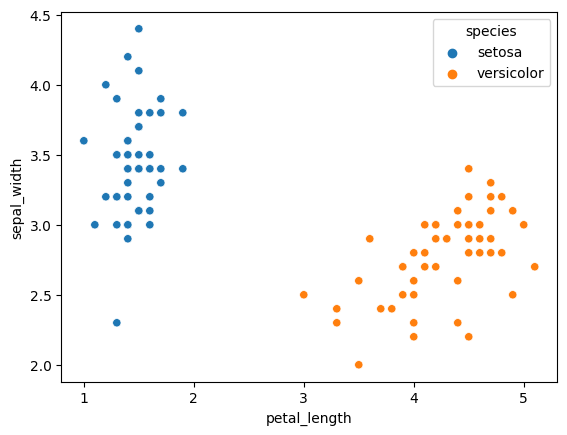

In [11]:
sns.scatterplot(x='petal_length', y='sepal_width', hue='species', data=iris)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into X (features) and y (target)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Remove the target column from the train and test sets (if present)
if 'species' in X_train.columns:
    X_train = X_train.drop('species', axis=1)
if 'species' in X_test.columns:
    X_test = X_test.drop('species', axis=1)

In [15]:
from sklearn.linear_model import Perceptron


In [16]:
# Create an instance of the Perceptron class
perceptron = Perceptron(random_state=42)

# Fit the model to the training data
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='versicolor')
recall = recall_score(y_test, y_pred, pos_label='versicolor')
f1 = f1_score(y_test, y_pred, pos_label='versicolor')

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define the predict function
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# define the train_weights function
def train_weights(train, l_rate, n_epoch):
    
    # initialize the weights to zero
    weights = [0.0 for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        
        sum_error = 0.0
        
        for row in train:
     
            prediction = predict(row, weights)
            
     
            error = row[-1] - prediction
            

            sum_error += error**2
            
        
            weights[0] = weights[0] + l_rate * error
   
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        
    return weights

def perceptron(train, test, l_rate, n_epoch):

    weights = train_weights(train, l_rate, n_epoch)
    predictions = []
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
        
    return predictions

X = iris[['sepal_length', 'sepal_width', 'species']].values
X[:, -1] = np.where(X[:, -1] == 'versicolor', 1, 0)
train_size = int(len(X) * 0.7)
train, test = X[:train_size,:], X[train_size:,:]
l_rate = 0.1
n_epoch = 5
predictions = perceptron(train, test, l_rate, n_epoch)
y_test = np.where(test[:, -1] == 1, 'versicolor', 'not versicolor')
y_pred = np.where(np.array(predictions) == 1, 'versicolor', 'not versicolor')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='versicolor')
recall = recall_score(y_test, y_pred, pos_label='versicolor')
f1 = f1_score(y_test, y_pred, pos_label='versicolor')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

epoch=0, lrate=0.100, error=2.000
epoch=1, lrate=0.100, error=2.000
epoch=2, lrate=0.100, error=2.000
epoch=3, lrate=0.100, error=2.000
epoch=4, lrate=0.100, error=2.000
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
